In [2]:
import os
import kalshi_python
import uuid
from pprint import pprint
from dotenv import load_dotenv, find_dotenv
from kalshi_python.models import *

load_dotenv(find_dotenv())

config = kalshi_python.Configuration()
# Comment the line below to use production
config.host = 'https://demo-api.kalshi.co/trade-api/v2'

# Create an API configuration passing your credentials.
# Use this if you want the kalshi_python sdk to manage the authentication for you.
kalshi_api = kalshi_python.ApiInstance(
    email=os.getenv('EMAIL'),
    password=os.getenv('PASSWORD'),
    configuration=config,
)

exchangeStatus = kalshi_api.get_exchange_status()
print('Exchange status response: ')
pprint(exchangeStatus)

# Gets the data for a specific series.
seriesTicker = 'FED'
seriesResponse = kalshi_api.get_series(seriesTicker)
print('\nSeries: ' + seriesTicker)
pprint(seriesResponse)

Exchange status response: 
{'exchange_active': True, 'trading_active': True}

Series: FED
{'series': {'frequency': 'custom', 'ticker': 'FED', 'title': 'Fed funds rate'}}


In [21]:
balanceResponse = kalshi_api.get_balance()
print('\nUser balance: ')
pprint(balanceResponse)


User balance: 
{'balance': 999711}


In [24]:
# Gets the data for a specific market.
marketTicker = 'INXD-23OCT16-B4312'
marketResponse = kalshi_api.get_market(marketTicker)
print('\nMarket: ' + marketTicker)
pprint(marketResponse)


Market: INXD-23OCT16-B4312
{'market': {'can_close_early': True,
            'cap_strike': 4324.99,
            'category': 'Financials',
            'close_time': '2023-10-16T20:00:00Z',
            'custom_strike': None,
            'event_ticker': 'INXD-23OCT16',
            'expiration_time': '2023-10-23T23:00:00Z',
            'expiration_value': '',
            'floor_strike': 4300,
            'last_price': 0,
            'liquidity': 0,
            'no_ask': 100,
            'no_bid': 100,
            'open_interest': 0,
            'open_time': '2023-10-13T20:00:00Z',
            'previous_price': 0,
            'previous_yes_ask': 0,
            'previous_yes_bid': 0,
            'result': '',
            'risk_limit_cents': 2500000,
            'status': 'active',
            'strike_type': 'between',
            'subtitle': '4,300 to 4,324.99',
            'ticker': 'INXD-23OCT16-B4312',
            'title': 'Will the S&P 500 be between 4300 and 4324.99 at the end '
       

In [25]:
if exchangeStatus.trading_active:
    # Submit an order for 10 yes contracts at 50cents on 'FED-23DEC-T3.00'.
    orderUuid = str(uuid.uuid4())
    orderResponse = kalshi_api.create_order(CreateOrderRequest(
        ticker=marketTicker,
        action='buy',
        type='limit',
        yes_price=50,
        count=10,
        client_order_id=orderUuid,
        side='yes',
    ))
    print('\nOrder submitted: ')
    pprint(orderResponse)
else:
    print('\nThe exchange is not trading active, no orders will be sent right now.')


Order submitted: 
{'order': {'action': 'buy',
           'client_order_id': 'd0dcccf8-0480-4541-adaf-b6e2ded924a1',
           'created_time': '2023-10-14T04:05:34.308607Z',
           'expiration_time': None,
           'no_price': 50,
           'order_id': '695a41b2-2c8b-421d-a779-af97fc2f6f87',
           'side': 'yes',
           'status': 'resting',
           'ticker': 'INXD-23OCT16-B4312',
           'type': 'limit',
           'user_id': '264a5568-c2bb-46b6-a172-0dc4fd414439',
           'yes_price': 50}}


# Testing Algo

In [3]:
import yfinance as yf
spx = yf.Ticker('^SPX')

# FETCH OPTIONS CHAIN DATA FOR THE COMPANY
spx_options = spx.option_chain()

KeyError: 'calls'

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Datetime'>

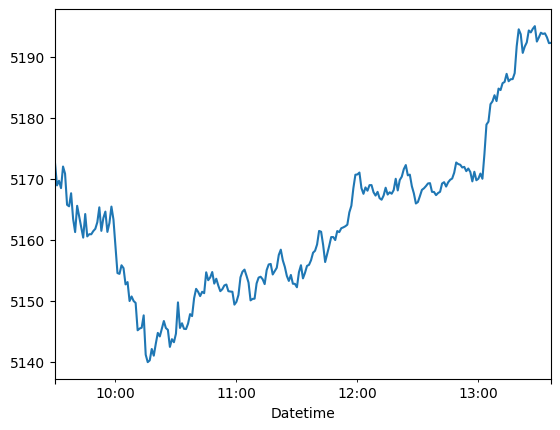

In [8]:
import datetime
data = yf.download('^SPX', 
                       start=datetime.date.today().strftime("%Y-%m-%d"),  
                       interval = "1m")
data['Close'].plot()

In [153]:
spx_options.puts['r_strike'] = spx_options.puts['strike'].apply(lambda x: round(x/30)*30)
spx_options.calls['r_strike'] = spx_options.calls['strike'].apply(lambda x: round(x/30)*30)
# spx_options.puts.groupby('r_strike').sum('openInterest').reset_index() #.hist(weights='openInterest', bins=80)
# spx_options.calls.groupby('r_strike').sum('openInterest').reset_index() #.hist(weights='openInterest', bins=80)

In [154]:
spx_options.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,r_strike
0,SPX231020P00200000,2023-10-02 14:56:23+00:00,200.0,0.05,0.0,0.0,0.0,0.0,10.0,131.0,0.500005,False,REGULAR,USD,210
1,SPX231020P00400000,2023-06-13 14:57:56+00:00,400.0,0.05,0.0,0.0,0.0,0.0,2.0,0.0,0.500005,False,REGULAR,USD,390
2,SPXW231020P00600000,2023-06-30 15:11:58+00:00,600.0,0.05,0.0,0.0,0.0,0.0,4.0,0.0,0.500005,False,REGULAR,USD,600
3,SPX231020P00800000,2023-09-20 17:41:50+00:00,800.0,0.05,0.0,0.2,0.0,0.0,1.0,2928.0,9.546879,False,REGULAR,USD,810
4,SPX231020P01000000,2023-09-18 11:57:11+00:00,1000.0,0.03,0.0,0.1,0.0,0.0,1.0,5287.0,7.890625,False,REGULAR,USD,990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,SPX231020P06000000,2023-10-11 13:35:35+00:00,6000.0,1616.25,1698.5,1750.5,0.0,0.0,1.0,220.0,0.000010,True,REGULAR,USD,6000
335,SPXW231020P06200000,2023-10-10 14:30:39+00:00,6200.0,1825.58,1967.5,1968.6,0.0,0.0,2.0,92.0,2.641117,True,REGULAR,USD,6210
336,SPXW231020P06400000,2023-10-18 15:37:11+00:00,6400.0,2054.40,2166.7,2167.8,0.0,0.0,8.0,14.0,2.699222,True,REGULAR,USD,6390
337,SPX231020P06600000,2023-08-23 16:30:47+00:00,6600.0,2121.25,2252.6,2256.9,0.0,0.0,1.0,34.0,0.000010,True,REGULAR,USD,6600


In [1]:
spx_options.puts.groupby('r_strike').sum('openInterest')

NameError: name 'spx_options' is not defined

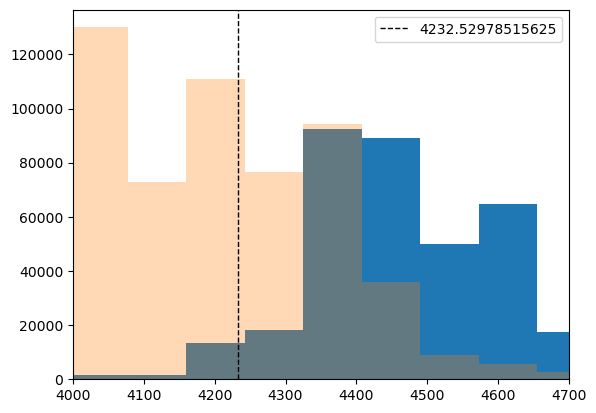

In [156]:
# plot histogram of strike with openInterest as count
import matplotlib.pyplot as plt
plt.hist(spx_options.calls['strike'], weights=spx_options.calls['openInterest'], bins=80)
plt.hist(spx_options.puts['strike'], weights=spx_options.puts['openInterest'], bins=80, alpha=0.3)
plt.axvline(data.Close.iloc[-1], color='k', linestyle='dashed', linewidth=1, label = data.Close.iloc[-1])
plt.xlim(4000, 4700)
plt.legend()

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 6.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 4.5000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 7.6300e+02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.1730e+03, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.7200e+02, 0.0000e+00,
        1.2550e+03, 0.0000e+00, 0.0000e+00, 3.1180e+03, 0.0000e+00,
        2.7060e+03, 1.5447e+04, 3.3145e+04, 0.0000e+00, 1.9009e+04,
        4.6080e+03, 1.5730e+03, 6.0100e+02, 4.0680e+03, 3.0280e+03,
        5.1300e+02, 1.3310e+03, 2.9290e+03, 5.7980e+03, 1.9610e+03,
        3.1700e+03, 6.2850e+03, 9.8080e+03, 1.4368e+04, 8.5060e+03,
        1.5297e+04, 1.8044e+04, 2.2114e+04, 1.2965e+04, 1.0922e+04,
        3.1380e+03, 1.6300e+03, 5.7400e+02, 2.6000e+02, 1.1400e+02,
        8.2300e+02, 8.2000e+01, 0.0000e+00, 0.00

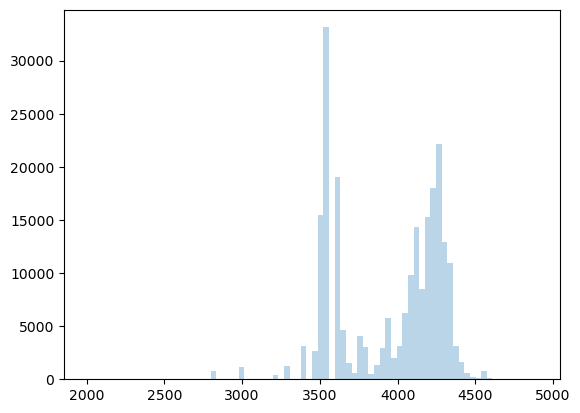

In [141]:
plt.hist(spx_options.puts['strike'], weights=spx_options.puts['openInterest'], bins=80, alpha=0.3)

In [142]:
spx_options.puts[spx_options.puts['openInterest'] == max(spx_options.puts['openInterest'])]

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,r_strike
11,SPXW231019P03550000,2023-10-18 20:14:44+00:00,3550.0,0.05,0.0,0.05,0.0,0.0,24393.0,33145,1.070317,False,REGULAR,USD,3540


In [ ]:
# algo
# Calculate open interest puts and calls around current price at 11AM (after morning action)
# if more puts,
# Vote no for 1 bracket above current price
# 

# Alternatively, for more risk higher return, yes for most open interest

# kinda like an (options) order book for SPX

# need to be in the middle of bracket, if not then no vote
# if VIX > x then no vote

In [15]:
hour = yf.download('^SPX', 
                       start='2023-8-18',  
                       end=datetime.date.today().strftime("%Y-%m-%d"),
                       interval = "1h")

daily = yf.download('^SPX', 
                       start='2023-8-18',  
                       end=datetime.date.today().strftime("%Y-%m-%d"),
                       interval = "1d")


daily.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-18,4344.879883,4381.819824,4335.310059,4369.709961,4369.709961,3940400000
2023-08-21,4380.279785,4407.549805,4360.299805,4399.770020,4399.770020,3726850000
2023-08-22,4415.330078,4418.589844,4382.770020,4387.549805,4387.549805,3522760000
2023-08-23,4396.439941,4443.180176,4396.439941,4436.009766,4436.009766,3837270000
2023-08-24,4455.160156,4458.299805,4375.549805,4376.310059,4376.310059,3723470000


In [10]:
hour = hour.between_time('11:30', '11:30')
daily['Day'] = daily.index.date
hour['Day'] = hour.index.date



In [11]:
# join hour and daily based on day
df2 = hour.merge(daily, on='Day', how='left', suffixes=('_hour', '_daily'))
df = df2[['Day', 'Close_hour', 'Close_daily']]
df.head()

,Day,Close_hour,Close_daily
0,2023-08-18,4364.209961,4369.709961
1,2023-08-21,4375.950195,4399.770020
2,2023-08-22,4392.029785,4387.549805
3,2023-08-23,4427.620117,4436.009766
4,2023-08-24,4406.740234,4376.310059


/var/folders/sb/j3m42l4j36x49gq6998z6jp00000gn/T/ipykernel_50057/4006564575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'] = df['Close_daily'] - df['Close_hour']


<Axes: >

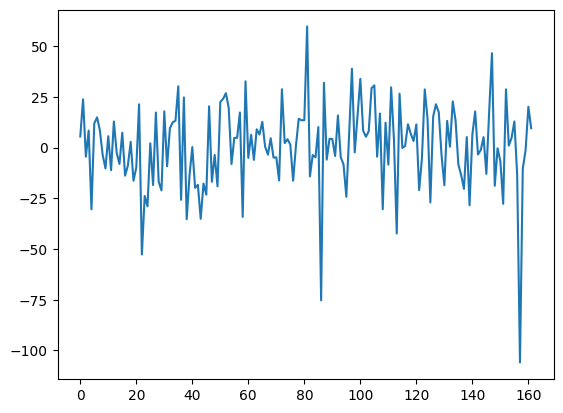

In [14]:
df['diff'] = df['Close_daily'] - df['Close_hour']
df['diff'].plot() # max move is about +20, -30

In [13]:
# get the diff that is less than 0
print(df3[df3['diff'] < 0]['diff'].mean(), df3[df3['diff'] < 0]['diff'].std())
print(df3[df3['diff'] > 0]['diff'].mean(), df3[df3['diff'] > 0]['diff'].std())

NameError: name 'df3' is not defined

In [157]:
print(df3[df3['diff'] < 0]['diff'].median(), df3[df3['diff'] < 0]['diff'].std())
print(df3[df3['diff'] > 0]['diff'].median(), df3[df3['diff'] > 0]['diff'].std())

-15.090087890625 11.9135528915036
12.199951171875 8.096845629753357


In [150]:

print(df3['diff'].mean(), df3['diff'].std())

-3.190952845982143 18.2724524290716
